Blibliotecas

In [31]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# Distancia de Minkowski:
$$Minkowski(X,Y,p) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$$


In [19]:
def minkowski(x, y, p):
    return np.sum(np.abs(x-y)** p)**(1/p)

# 2-aproximativo

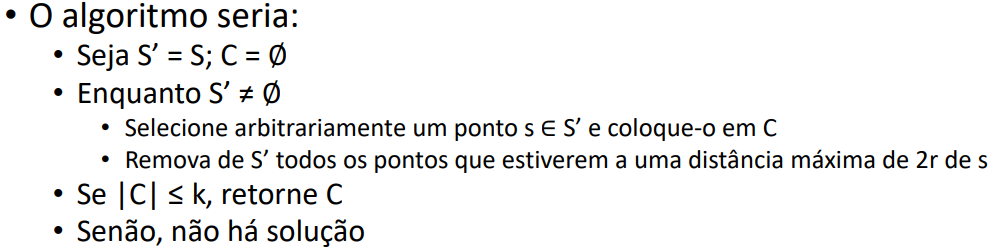


In [20]:
def two_approximation(S, k, r, p):
    S_copy = S.copy()
    C = []
    while len(S_copy) > 0:
        s = S_copy[0]
        C.append(s)
        S_copy = [point for point in S_copy if minkowski(point, s, p) > 2 * r]
    
    if len(C) <= k:
        return C
    else:
        return None

In [56]:
def refining_two_approximation(S, k, iteration):
    dim = 1 if type(S[0]) == int else len(S[0])
    rmax =  np.max([minkowski(S[i], S[j], dim) for i in range(len(S)) for j in range(i+1,len(S))])
    low, high = 0, rmax
    low_v = [low]
    high_v = [high]
    for i in range(iteration):
        mid = (high+low)//2
        C = two_approximation(S, k, mid, len(S[0]))
        if C is not None:
            high = mid -1
        else:
            low = mid + 1
        high_v.append(high)
        low_v.append(low)
    return C, high_v, low_v
    

In [35]:
n_samples = 500
seed = 30

noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)


noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)


blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)


rng = np.random.RandomState(seed)


no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets_v = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2})
    ,
    (no_structure, {}),
]

In [49]:
h, l, clusters = refining_two_approximation(datasets_v[-2][0][0],3,10)

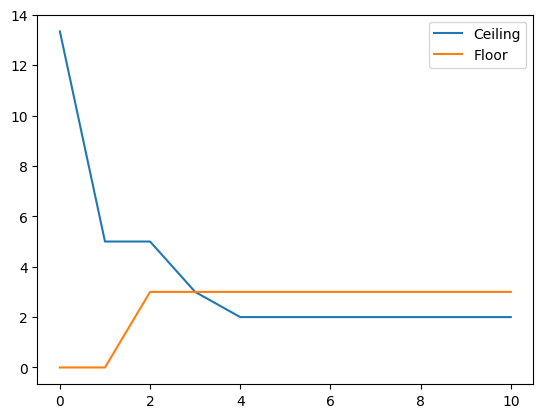

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h, label = "Ceiling") 
plt.plot(range(len(l)), l, label = "Floor") 
plt.legend() 
plt.show()

In [57]:
data, group = datasets_v[-2][0][0], datasets_v[-2][0][1]